In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ev_data=pd.read_csv("/kaggle/input/electric-vehicles/Electric_Vehicle_Population_Data.csv")

In [3]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
ev_data.shape

(177866, 17)

In [8]:
ev_data=ev_data.dropna()

In [9]:
ev_data.shape

(177473, 17)

In [10]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

**EV Adoption Over Time**

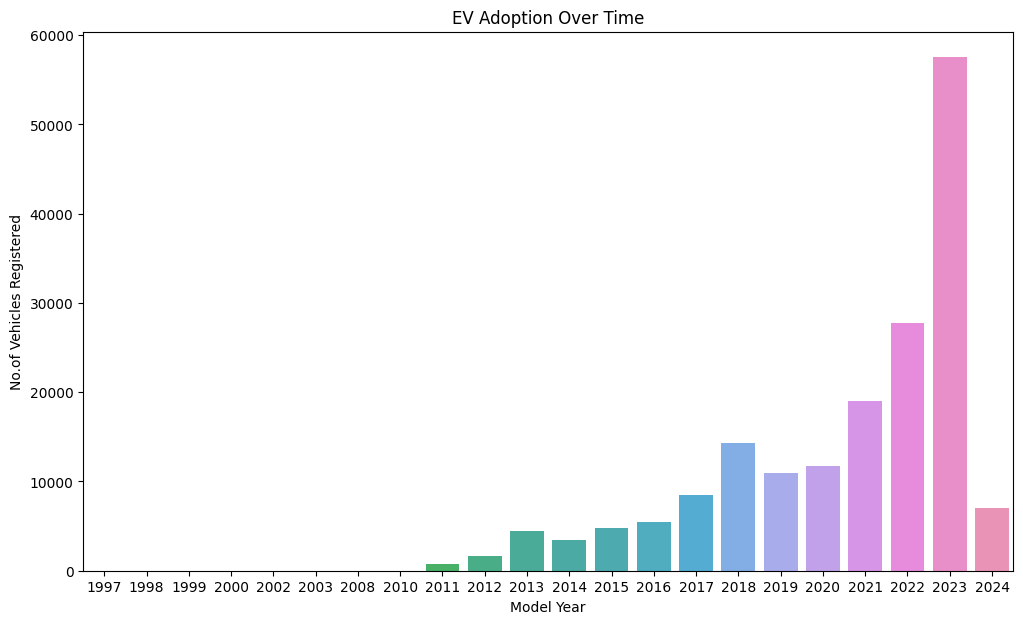

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(x="Model Year",data=ev_data)
plt.title('EV Adoption Over Time')
plt.xlabel("Model Year")
plt.ylabel("No.of Vehicles Registered")
plt.show()

From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

**Geographical Distribution**

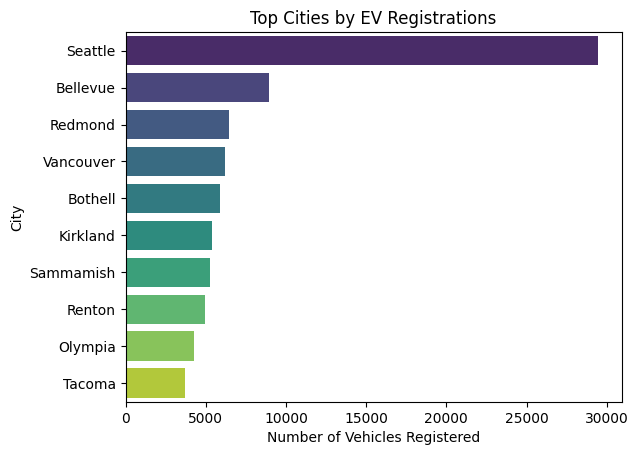

In [12]:
city=ev_data["City"].value_counts().head(10)
sns.barplot(x=city.values,y=city.index,palette='viridis')
plt.title('Top Cities by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.show()

Seattle,has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
Bellevue and Redmond, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.

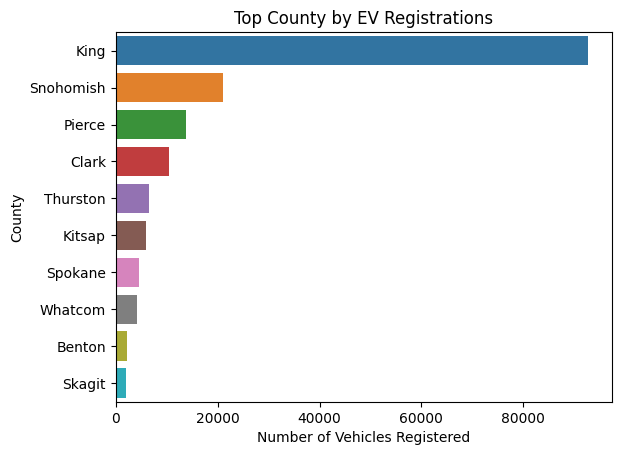

In [13]:
county=ev_data["County"].value_counts().head(10)
sns.barplot(x=county.values,y=county.index)
plt.title('Top County by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('County')
plt.show()

King County, has the highest number of EV registrations by a significant margin, far outpacing the other counties listed.

**EV Types**

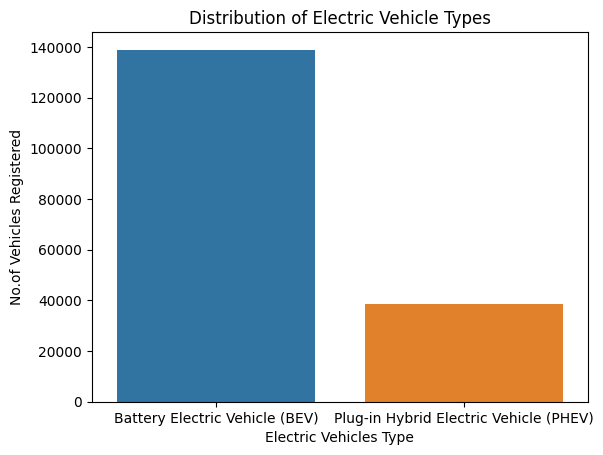

In [14]:
sns.countplot(x="Electric Vehicle Type",data=ev_data)
plt.title("Distribution of Electric Vehicle Types")
plt.xlabel("Electric Vehicles Type")
plt.ylabel("No.of Vehicles Registered")
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered

**Make and Model Popularity**

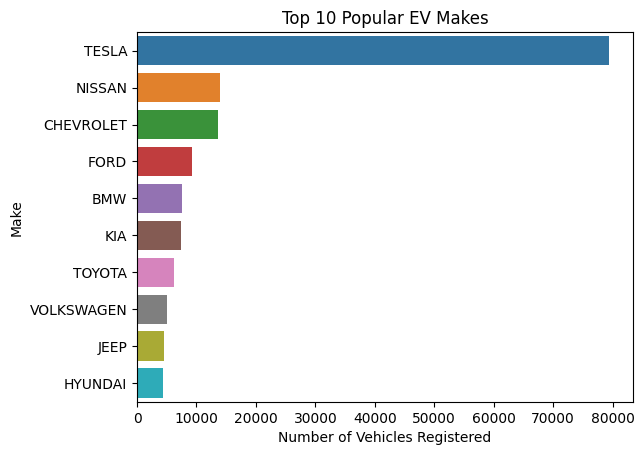

In [15]:
ev_make_distribution=ev_data["Make"].value_counts().head(10)
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index)
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.show()

The above chart shows that:

TESLA leads by a substantial margin with the highest number of vehicles registered.

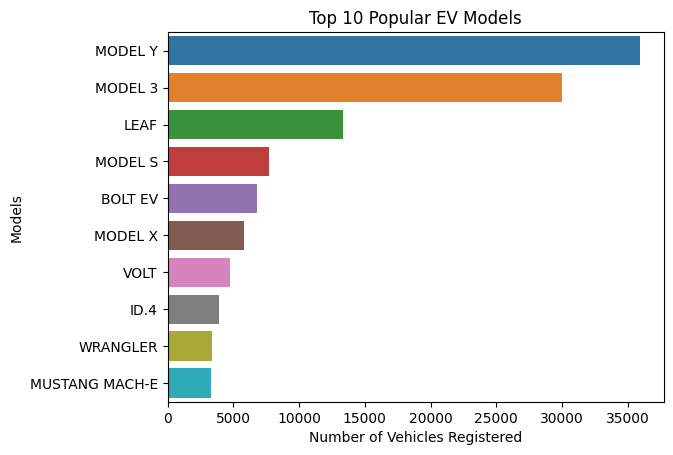

In [16]:
ev_model_distribution=ev_data["Model"].value_counts().head(10)
sns.barplot(x=ev_model_distribution.values,y=ev_model_distribution.index)
plt.title('Top 10 Popular EV Models')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Models')
plt.show()

MODEL Y having the highest number of registrations.

**Electric Range Analysis with respect to Make**

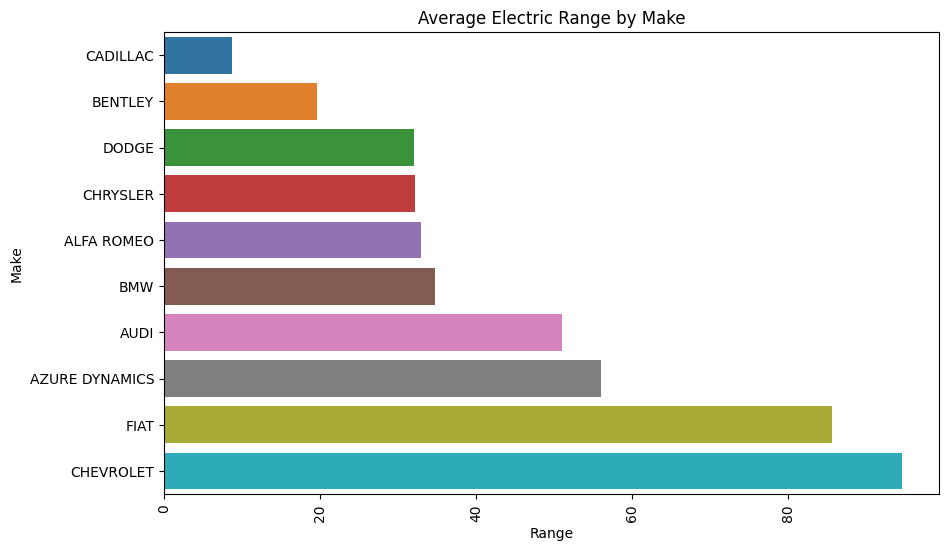

In [17]:

rng_mk_grp = ev_data.groupby('Make')['Electric Range'].mean().reset_index().head(10)
rng_mk_grp = rng_mk_grp.sort_values(by='Electric Range', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x="Electric Range", y="Make", data=rng_mk_grp)
plt.xticks(rotation=90)
plt.title('Average Electric Range by Make')
plt.xlabel("Range")
plt.ylabel("Make")
plt.show()

From the Above graph we conclude that Chevrolet has maximum Range follwed by Fiat

**Estimated Growth of EV Vehicles in Market Size**

In [18]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

In 2021, there were 19,063 EVs registered.
In 2022, the number increased to 27708 EVs.
In 2023, a significant jump to 57,519 EVs was observed.
For 2024, currently, 7,072 EVs are registered, which suggests partial data.

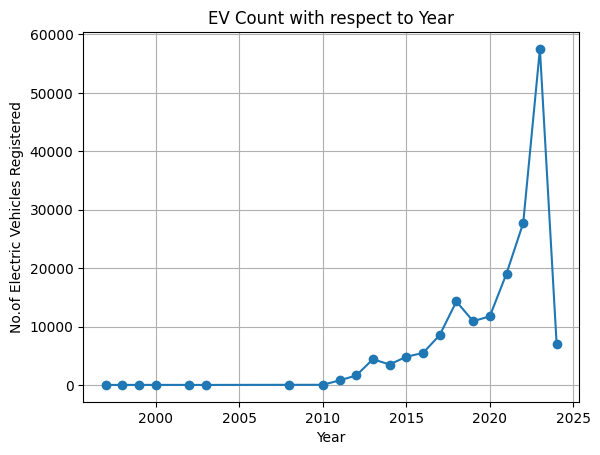

In [21]:
value_counts=ev_data['Model Year'].value_counts().sort_index()
plt.plot(value_counts.index, value_counts.values, marker='o')
plt.title("EV Count with respect to Year")
plt.xlabel("Year")
plt.ylabel("No.of Electric Vehicles Registered")
plt.grid()
plt.show()

**Summary**

So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From our market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.